<a href="https://colab.research.google.com/github/rweidinger/dogapp/blob/dev/GPU_Puppy_Party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Net for Dog Image Recognition

## Environment Setup

Import libraries and mount Drive

In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.0.0'

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn import neural_network
import scipy.io as sio
import tarfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [8]:
'''
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))
'''

'\nimport timeit\n\ndevice_name = tf.test.gpu_device_name()\nif device_name != \'/device:GPU:0\':\n  print(\n      \'\n\nThis error most likely means that this notebook is not \'\n      \'configured to use a GPU.  Change this in Notebook Settings via the \'\n      \'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n\')\n  raise SystemError(\'GPU device not found\')\n\ndef cpu():\n  with tf.device(\'/cpu:0\'):\n    random_image_cpu = tf.random.normal((100, 100, 100, 3))\n    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)\n    return tf.math.reduce_sum(net_cpu)\n\ndef gpu():\n  with tf.device(\'/device:GPU:0\'):\n    random_image_gpu = tf.random.normal((100, 100, 100, 3))\n    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)\n    return tf.math.reduce_sum(net_gpu)\n  \n# We run each op once to warm up; see: https://stackoverflow.com/a/45067900\ncpu()\ngpu()\n\n# Run the op several times.\nprint(\'Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 ima

## Import train and test data

In [17]:
# Define function to download .mat files
def loadMatFile(file_name):
  root_path = 'data/'
  return sio.loadmat(root_path + file_name)

In [18]:
# Import train and test sets
train_dict = loadMatFile('train_data.mat')
test_dict = loadMatFile('test_data.mat')
train_data = train_dict['train_data']
test_data = test_dict['test_data']

OSError: could not read bytes

## Exploratory Data Analysis

In [0]:
train_dict

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:03:37 2012',
 '__version__': '1.0',
 'train_data': array([[1.        , 0.37021212, 0.38627623, ..., 0.21216631, 0.33752761,
         0.26825407],
        [0.37021212, 1.        , 0.45434285, ..., 0.14359524, 0.3095    ,
         0.17709522],
        [0.38627623, 0.45434285, 1.        , ..., 0.16968838, 0.28702648,
         0.20437348],
        ...,
        [0.21216631, 0.14359524, 0.16968838, ..., 1.        , 0.22314713,
         0.41941136],
        [0.33752761, 0.3095    , 0.28702648, ..., 0.22314713, 1.        ,
         0.31585238],
        [0.26825407, 0.17709522, 0.20437348, ..., 0.41941136, 0.31585238,
         1.        ]]),
 'train_fg_data': array([[4.32900433e-04, 2.88600289e-04, 2.88600289e-04, ...,
         3.96825397e-04, 3.24675325e-04, 2.30880231e-03],
        [0.00000000e+00, 6.34920635e-04, 6.98412698e-04, ...,
         1.90476190e-04, 3.17460317e-05, 4.09523810e-03],

In [0]:
train_data[100].shape

(12000,)

In [0]:
train_data.shape

(12000, 12000)

In [0]:
test_data.shape

(8580, 12000)

In [0]:
test_data[0].shape

(12000,)

In [0]:
fpath = "../input/images/Images/"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

In [0]:
img = Image.fromarray(test_data[0].reshape(32,32,3), 'RGB') 

ValueError: ignored

IndexError: ignored

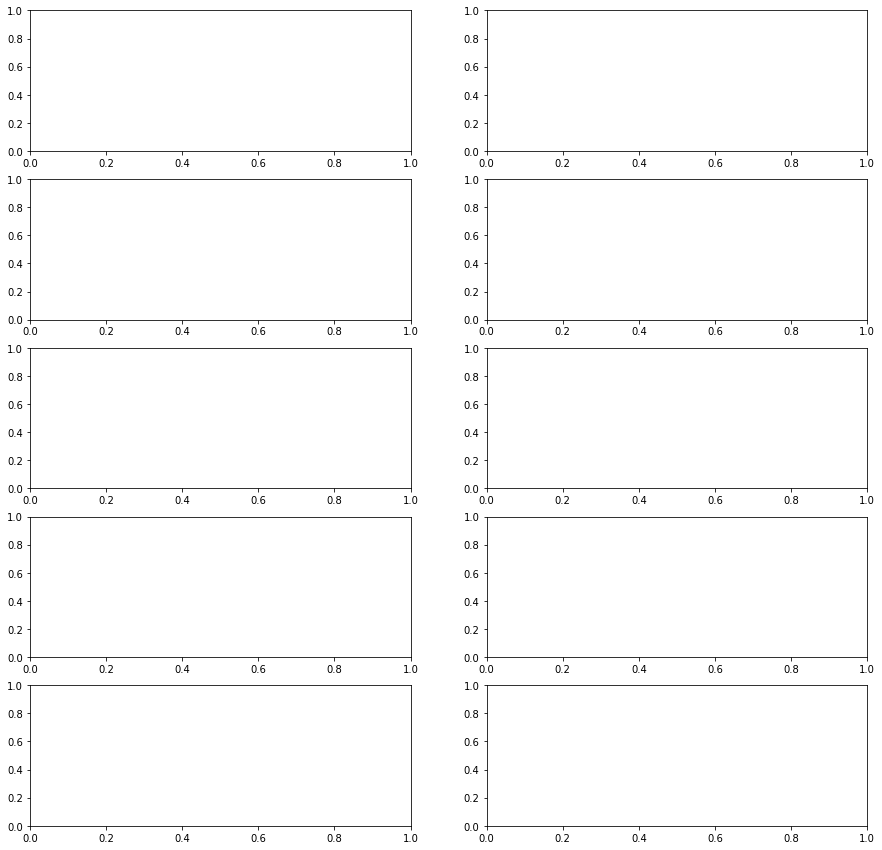

In [0]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

## Model Instantiation

In [0]:
MLPC_nn = neural_network.MLPClassifier()